### Introduction: 
Introduce the project, your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.


### The Metric: 
Describe your metric, what features are you measuring. What datasets are you using?
Our goal was to find the dryest neighborhood, based on the lack of pools, fewest amount of water features, and the overall lowest median age of death. The data sets we used we used were [City Pools](https://data.wprdc.org/dataset/city-pools/resource/5cc254fe-2cbd-4912-9f44-2f95f0beea9a), [Water Features](https://data.wprdc.org/dataset/city-water-features/resource/513290a6-2bac-4e41-8029-354cbda6a7b7), and [Median Age at Death 2011-15 by Neighborhood](https://data.wprdc.org/dataset/median-age-death/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2). 

### The Best Neighborhood:

In [1]:
import pandas as pd
import numpy as np

### City Pools

In [2]:
#load the city pools csv and the neighborhoods csv
city_pools = pd.read_csv("CityPools.csv")
nbhoods = pd.read_csv("neighborhoods.csv")

#### Important Information
##### City Pools
 * column 2, 'retired' has 0 non-null values
 * columns of interest are: name, capacity and neighborhood

##### Neighborhoods
 * column 20, "hood", has the names of all 90 neighborhoods 

South Side Flats            2
Highland Park               2
Beechview                   1
Bloomfield                  1
Hazelwood                   1
Troy Hill                   1
East Hills                  1
Homewood South              1
Brighton Heights            1
Greenfield                  1
Lincoln Place               1
Shadyside                   1
Banksville                  1
Brookline                   1
Carrick                     1
Mount Washington            1
Perry North                 1
Squirrel Hill South         1
Sheraden                    1
Allegheny Center            1
Beltzhoover                 1
Polish Hill                 1
Westwood                    1
South Side Slopes           1
Bedford Dwellings           1
Lincoln-Lemington-Belmar    1
Name: neighborhood, dtype: int64
26


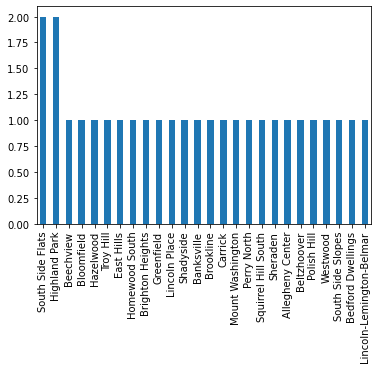

In [3]:
#number of pools per neighborhood -- aka the num of times each neigborhood appears
nb_counts = city_pools['neighborhood'].value_counts().sort_values(ascending=False)
print(nb_counts)
print(len(nb_counts))
nb_counts.to_frame()
nb_counts.plot(kind='bar')

#### Neighborhoods in city_pools
top 2 neighborhoods to avoid are South Side Flats and Highland Park

city_pools only includes 26/90 neighborhoods
 
 --> there are 64 neighborhoods with 0 pools

## Neighborhood Water Features

### data sample

In [4]:
import pandas as pd

water_feat = pd.read_csv("water_features.csv", sep=",")
water_feat.head()

,id,name,control_type,feature_type,inactive,make,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1816791851,Able Long Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003192000,5,19,6,4-28,40.408440,-80.028330
1,1599892422,Albert Turk Graham Park,On/Off,Drinking Fountain,f,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440453,-79.984064
2,1422043278,Allegheny Commons Arch St,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454390,-80.008281
3,1237191582,Allegheny Commons East Tennis Courts,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450874,-80.001962
4,1146184773,Allegheny Commons Pool,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.451003,-80.001502


### data results

Spring Garden           1
Fineview                1
Bluff                   1
Homewood South          1
Middle Hill             1
                       ..
Terrace Village         8
Allegheny Center        8
Bloomfield              8
Highland Park          12
Squirrel Hill South    14
Name: neighborhood, Length: 66, dtype: int64


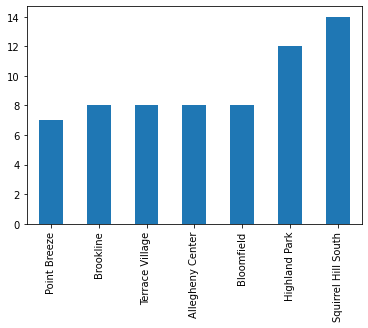

In [5]:
neigh_num_values = water_feat["neighborhood"].value_counts().sort_values(ascending = True) 

print(neigh_num_values)
neigh_num_values.tail(7).plot(kind = "bar")

#### output

we see that the worst neighborhood based on water features is Squirrel hill south closely followed by Highland park on being the neighborhood with most water

#### Median Age at Death

In [53]:
median_death = pd.read_csv('medianagedeath.csv')
median_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NEIGHBORHOOD           91 non-null     object 
 1   BLACKdeaths            90 non-null     float64
 2   Black MD AGE AT DEATH  77 non-null     float64
 3   WHITEdeaths            90 non-null     float64
 4   White MD AGE AT DEATH  81 non-null     float64
 5   TOTALdeaths*           90 non-null     float64
 6   TOTAL MD AGE AT DEATH  89 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.2+ KB


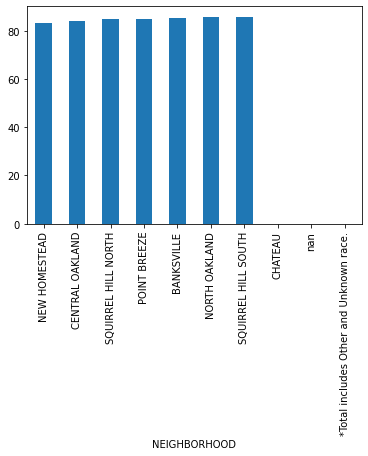

In [54]:
median_death = median_death.set_index("NEIGHBORHOOD", inplace=False)
median_death_total = median_death['TOTAL MD AGE AT DEATH'].sort_values(ascending=True)
median_death_total.dropna()
median_death_total.tail(10).plot(kind='bar')

In [62]:

print('squirrel hill south (max):', median_death_total.max())
print('fairywood (min):', median_death_total['FAIRYWOOD'])
print(median_death_total['SQUIRREL HILL SOUTH'])
print(median_death_total['HIGHLAND PARK'])
print(median_death_total['SOUTHSIDE FLATS'])

squirrel hill south (max): 85.9
fairywood (min): 53.3
85.9
79.2
78.4


Squirrel Hill South, Highland Park, and Southside Flats are the three neighborhoods to avoid based on the data about the pools and water features in these neighborhoods. However, these neighborhoods also have high median ages of death, proving that fear of water has little connection to actual death, and Thalassaphobiacs should balance their fear with their desire to live long lives. 

### Conclusion
#### Samy

I am afraid of swimming pools, but while I don't want to get in the deep end of a pool or drown in one, I wouldn't mind living in a neihborhood that has one. Therefore I wouldn't mind living in Squirrel Hill South despite its neihg number of pools becuase I would live to live long. the nieghboorhood is described as charming and leafy, which is good enough for me. 
#### Praz

As a person not from Pittsburgh and who doesn’t really know much of the neighborhoods here, I would personally take my chances and try my best to overcome my fear of water so I can lead longer life even if it would be painful. I would live at squirrel hill south.